In [1]:
## récup DATA sur Lex

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import re
from io import StringIO
import os
from os.path import basename, splitext
#from pathlib import Path
import seaborn as sns


In [2]:
#fonction de récupération des matrices des fichiers .md
def get_sections(s):
    for sec in s.split('## '):
        yield sec if sec.startswith('## ') else '## '+sec

In [3]:
#fonction de production des donnnées sous forme de tableau propre
def prod_DF(texteT,titre,subfile):
    dfGlobalDataLoc = pd.DataFrame(columns=['accuracy', 'precision', 'recall','support','typology','label'])
    for i,sec in enumerate(get_sections(texteT)):
        if i == 0:
            pass
        else:
            print(i,sec)
            sec2 = re.sub('##.*', '', sec)
            currentVal = re.search('##\s*(\w*)\n', sec).group(1)
            df = pd.read_csv(StringIO(sec2.replace(' ', '')), sep='|',index_col=1).dropna(axis=1,how='all').iloc[1:]
            df.insert(4,"type",subfile, True)
            titreOk =  titre.partition("Lex")[0]
            df.insert(5,"typology",titreOk,True)
            df.insert(6,"label",currentVal,True)
            dfGlobalDataLoc = dfGlobalDataLoc.append(df)
    print(dfGlobalDataLoc)        
    return dfGlobalDataLoc

In [4]:
dfGlobalData = pd.DataFrame(columns=['accuracy', 'precision', 'recall','support','type','typology','label'])

In [5]:
basepath = 'tableursParVal/'
for subFile in os.listdir(basepath):
    if os.path.isdir(os.path.join(basepath, subFile)):
        dir_path = os.path.join(basepath, subFile)+'/Lex/'
        print(dir_path)
        for entry in os.listdir(dir_path):
            if entry.endswith('ConfusionLex.md'):
                fullPath =dir_path+entry
                with open(fullPath, 'r') as f:
                    texteT = f.read()
                    print(f)
                    t = splitext(basename(fullPath))[0]
                    titre = t.partition(".tsv")[0]
                    dfGlobalDataLoc = prod_DF(texteT,titre,subFile)
                    dfGlobalData = dfGlobalData.append(dfGlobalDataLoc)

tableursParVal/deaf/Lex/
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/NoomenFabl_transB*Lex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7619   | 0.5337    | 0.5068 | 42      |
| known-tokens     | 0.7619   | 0.5337    | 0.5068 | 42      |
| ambiguous-tokens | 0.7143   | 0.4167    | 0.4375 | 7       |


                 accuracy precision  recall support            typology label  \
all                0.7619    0.5337  0.5068      42  NoomenFabl_transB*   POS   
known-tokens       0.7619    0.5337  0.5068      42  NoomenFabl_transB*   POS   
ambiguous-tokens   0.7143    0.4167  0.4375       7  NoomenFabl_transB*   POS   

                  type  
all               deaf  
known-tokens      deaf  
ambiguous-tokens  deaf  
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/PercLo_SLex.tsv-POSConfusionLex.md' mode='r' encodin

<_io.TextIOWrapper name='tableursParVal/deaf/Lex/MarieFab_CLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.5862   | 0.4025    | 0.4593 | 29      |
| known-tokens     | 0.5862   | 0.4025    | 0.4593 | 29      |
| ambiguous-tokens | 0.25     | 0.1       | 0.2    | 4       |


                 accuracy precision  recall support    typology label  type
all                0.5862    0.4025  0.4593      29  MarieFab_C   POS  deaf
known-tokens       0.5862    0.4025  0.4593      29  MarieFab_C   POS  deaf
ambiguous-tokens     0.25       0.1     0.2       4  MarieFab_C   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/PriereTheopSLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| a

                 accuracy precision  recall support       typology label  type
all                0.6933    0.3773  0.3676      75  ContPerc4Lo_A   POS  deaf
known-tokens       0.6933    0.3773  0.3676      75  ContPerc4Lo_A   POS  deaf
ambiguous-tokens   0.6667    0.3929  0.3095      12  ContPerc4Lo_A   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/RenN_KLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7857   | 0.6087    | 0.6087 | 42      |
| known-tokens     | 0.7857   | 0.6087    | 0.6087 | 42      |
| ambiguous-tokens | 0.6667   | 0.3333    | 0.3333 | 9       |
| unknown-targets  | 0.2      | 0.1111    | 0.1111 | 5       |


                 accuracy precision  recall support typology  label  type
all                0.7857    0.6087  0.6087      42   RenN_K  lemma  deaf
known-tokens       0.7857    0.6

                 accuracy precision  recall support   typology  label  type
all                0.8701    0.7656   0.756      77  JacAmArtK  lemma  deaf
known-tokens       0.8701    0.7656   0.756      77  JacAmArtK  lemma  deaf
ambiguous-tokens   0.6923    0.6364  0.5758      13  JacAmArtK  lemma  deaf
unknown-targets       0.0       0.0     0.0       1  JacAmArtK  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/RenN_ILex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9459   | 0.9032    | 0.8871 | 37      |
| known-tokens     | 0.9459   | 0.9032    | 0.8871 | 37      |
| ambiguous-tokens | 0.6      | 0.4286    | 0.4286 | 5       |


                 accuracy precision  recall support typology  label  type
all                0.9459    0.9032  0.8871      37   RenN_I  lemma  deaf
known-tokens       0.9459    0.

                 accuracy precision  recall support   typology  label  type
all                0.7714     0.625   0.599      35  CalendreS  lemma  deaf
known-tokens       0.7714     0.625   0.599      35  CalendreS  lemma  deaf
ambiguous-tokens   0.5556    0.3636  0.3333       9  CalendreS  lemma  deaf
unknown-targets       0.0       0.0     0.0       2  CalendreS  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/ChastVergiS_GLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8657   | 0.7628    | 0.7473 | 67      |
| known-tokens     | 0.8657   | 0.7628    | 0.7473 | 67      |
| ambiguous-tokens | 0.6111   | 0.3111    | 0.2778 | 18      |


                 accuracy precision  recall support       typology  label  \
all                0.8657    0.7628  0.7473      67  ChastVergiS_G  lemma   
known-tokens      

                 accuracy precision  recall support    typology  label  type
all                0.9355    0.9167  0.9167      31  MarieFab_E  lemma  deaf
known-tokens       0.9355    0.9167  0.9167      31  MarieFab_E  lemma  deaf
ambiguous-tokens      1.0       1.0     1.0       3  MarieFab_E  lemma  deaf
unknown-targets       0.0       0.0     0.0       2  MarieFab_E  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/BenTroieCLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8375   | 0.6837    | 0.6905 | 80      |
| known-tokens     | 0.8375   | 0.6837    | 0.6905 | 80      |
| ambiguous-tokens | 0.6471   | 0.3594    | 0.375  | 17      |
| unknown-targets  | 1.0      | 1.0       | 1.0    | 1       |


                 accuracy precision  recall support   typology  label  type
all                0.8375    0.6

                 accuracy precision recall support     typology label  type
all                0.5952    0.4223  0.438      42  NarcisusP_C   POS  deaf
known-tokens       0.5952    0.4223  0.438      42  NarcisusP_C   POS  deaf
ambiguous-tokens      0.2       0.2   0.04       5  NarcisusP_C   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/BenDucF_TLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7477   | 0.5979    | 0.6003 | 107     |
| known-tokens     | 0.7477   | 0.5979    | 0.6003 | 107     |
| ambiguous-tokens | 0.3333   | 0.2647    | 0.2647 | 15      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 6       |


                 accuracy precision  recall support   typology  label  type
all                0.7477    0.5979  0.6003     107  BenDucF_T  lemma  deaf
known-tokens       0.7477    0.5979  

                 accuracy precision  recall support  typology  label  type
all                0.8125    0.6346  0.6274      64  HermValS  lemma  deaf
known-tokens       0.8125    0.6346  0.6274      64  HermValS  lemma  deaf
ambiguous-tokens   0.4167    0.2308  0.2308      12  HermValS  lemma  deaf
unknown-targets      0.25    0.1429  0.1429       4  HermValS  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/CalendreSLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8857   | 0.6111    | 0.6309 | 35      |
| known-tokens     | 0.8857   | 0.6111    | 0.6309 | 35      |
| ambiguous-tokens | 0.625    | 0.625     | 0.5312 | 8       |


                 accuracy precision  recall support   typology label  type
all                0.8857    0.6111  0.6309      35  CalendreS   POS  deaf
known-tokens       0.8857    0.6111

                 accuracy precision recall support        typology label  type
all                0.6875    0.5177    0.6      32  ContPerc_4_TW*   POS  deaf
known-tokens       0.6875    0.5177    0.6      32  ContPerc_4_TW*   POS  deaf
ambiguous-tokens      0.6     0.375    0.5       5  ContPerc_4_TW*   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/ContPerc_4_TW*Lex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9062   | 0.7931    | 0.7931 | 32      |
| known-tokens     | 0.9062   | 0.7931    | 0.7931 | 32      |
| ambiguous-tokens | 1.0      | 1.0       | 1.0    | 1       |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 2       |


                 accuracy precision  recall support        typology  label  \
all                0.9062    0.7931  0.7931      32  ContPerc_4_TW*  lemma   
known-tokens    

                 accuracy precision  recall support typology label  type
all                0.6627    0.3396  0.3346      83    EdmK*   POS  deaf
known-tokens       0.6627    0.3396  0.3346      83    EdmK*   POS  deaf
ambiguous-tokens   0.4706     0.425  0.3243      17    EdmK*   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/SGillesPLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6026   | 0.259     | 0.2602 | 78      |
| known-tokens     | 0.6026   | 0.259     | 0.2602 | 78      |
| ambiguous-tokens | 0.2308   | 0.2037    | 0.2361 | 13      |


                 accuracy precision  recall support  typology label  type
all                0.6026     0.259  0.2602      78  SGillesP   POS  deaf
known-tokens       0.6026     0.259  0.2602      78  SGillesP   POS  deaf
ambiguous-tokens   0.2308    0.2037  0.2361    

                 accuracy precision  recall support typology  label  type
all                 0.875    0.7059  0.7059      40   RenN_O  lemma  deaf
known-tokens        0.875    0.7059  0.7059      40   RenN_O  lemma  deaf
ambiguous-tokens    0.875       0.6     0.6       8   RenN_O  lemma  deaf
unknown-targets    0.6667       0.5     0.5       3   RenN_O  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/SThibAlMLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7981   | 0.6096    | 0.6198 | 104     |
| known-tokens     | 0.7981   | 0.6096    | 0.6198 | 104     |
| ambiguous-tokens | 0.6316   | 0.2632    | 0.2632 | 19      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 1       |


                 accuracy precision  recall support  typology  label  type
all                0.7981    0.6096  0.6198     1

                 accuracy precision  recall support typology  label  type
all                0.7971    0.6383  0.6277      69    Aucun  lemma  deaf
known-tokens       0.7971    0.6383  0.6277      69    Aucun  lemma  deaf
ambiguous-tokens   0.2857      0.25    0.25       7    Aucun  lemma  deaf
unknown-targets       0.2       0.2     0.2       5    Aucun  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/MarieMil_SLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7273   | 0.4667    | 0.5373 | 33      |
| known-tokens     | 0.7273   | 0.4667    | 0.5373 | 33      |
| ambiguous-tokens | 0.2857   | 0.1429    | 0.2857 | 7       |


                 accuracy precision  recall support    typology label  type
all                0.7273    0.4667  0.5373      33  MarieMil_S   POS  deaf
known-tokens       0.7273    0.4667  

<_io.TextIOWrapper name='tableursParVal/deaf/Lex/RenNouvRLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6667   | 0.4056    | 0.3819 | 33      |
| known-tokens     | 0.6667   | 0.4056    | 0.3819 | 33      |
| ambiguous-tokens | 0.5      | 0.4       | 0.4    | 6       |


                 accuracy precision  recall support  typology label  type
all                0.6667    0.4056  0.3819      33  RenNouvR   POS  deaf
known-tokens       0.6667    0.4056  0.3819      33  RenNouvR   POS  deaf
ambiguous-tokens      0.5       0.4     0.4       6  RenNouvR   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/RolSLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all            

                 accuracy precision  recall support        typology  label  \
all                0.8531    0.6596  0.6408     422  SLouisPathMirF  lemma   
known-tokens       0.8531    0.6596  0.6408     422  SLouisPathMirF  lemma   
ambiguous-tokens   0.6418    0.4607  0.4133      67  SLouisPathMirF  lemma   
unknown-targets       0.0       0.0     0.0      17  SLouisPathMirF  lemma   

                  type  
all               deaf  
known-tokens      deaf  
ambiguous-tokens  deaf  
unknown-targets   deaf  
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/PercLo_QLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9118   | 0.9167    | 0.8958 | 34      |
| known-tokens     | 0.9118   | 0.9167    | 0.8958 | 34      |
| ambiguous-tokens | 0.7143   | 0.6667    | 0.6667 | 7       |


                 accuracy precision  reca

ambiguous-tokens    0.375    0.3333  0.2083       8  GuischartG_H   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/ElesB_GLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.5854   | 0.4503    | 0.4693 | 41      |
| known-tokens     | 0.5854   | 0.4503    | 0.4693 | 41      |
| ambiguous-tokens | 0.4667   | 0.4833    | 0.4333 | 15      |


                 accuracy precision  recall support typology label  type
all                0.5854    0.4503  0.4693      41  ElesB_G   POS  deaf
known-tokens       0.5854    0.4503  0.4693      41  ElesB_G   POS  deaf
ambiguous-tokens   0.4667    0.4833  0.4333      15  ElesB_G   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/MaccabESLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|--

<_io.TextIOWrapper name='tableursParVal/deaf/Lex/MarieFab_KLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8493   | 0.7456    | 0.7368 | 73      |
| known-tokens     | 0.8493   | 0.7456    | 0.7368 | 73      |
| ambiguous-tokens | 0.6364   | 0.6       | 0.54   | 11      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 5       |


                 accuracy precision  recall support    typology  label  type
all                0.8493    0.7456  0.7368      73  MarieFab_K  lemma  deaf
known-tokens       0.8493    0.7456  0.7368      73  MarieFab_K  lemma  deaf
ambiguous-tokens   0.6364       0.6    0.54      11  MarieFab_K  lemma  deaf
unknown-targets       0.0       0.0     0.0       5  MarieFab_K  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/CourtArrF2*Lex.tsv-LemmaConfusionLex.md' mode='r' encoding

                 accuracy precision  recall support     typology label  type
all                0.6774    0.4218  0.3893      31  AngVieGregM   POS  deaf
known-tokens       0.6774    0.4218  0.3893      31  AngVieGregM   POS  deaf
ambiguous-tokens      0.0       0.0     0.0       1  AngVieGregM   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/GuillMarMLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7209   | 0.4343    | 0.4456 | 43      |
| known-tokens     | 0.7209   | 0.4343    | 0.4456 | 43      |
| ambiguous-tokens | 0.7857   | 0.55      | 0.6333 | 14      |


                 accuracy precision  recall support   typology label  type
all                0.7209    0.4343  0.4456      43  GuillMarM   POS  deaf
known-tokens       0.7209    0.4343  0.4456      43  GuillMarM   POS  deaf
ambiguous-tokens   0.7857  

1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8955   | 0.7589    | 0.7679 | 67      |
| known-tokens     | 0.8955   | 0.7589    | 0.7679 | 67      |
| ambiguous-tokens | 0.75     | 0.5       | 0.6667 | 4       |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 4       |


                 accuracy precision  recall support  typology  label  type
all                0.8955    0.7589  0.7679      67  DrouartB  lemma  deaf
known-tokens       0.8955    0.7589  0.7679      67  DrouartB  lemma  deaf
ambiguous-tokens     0.75       0.5  0.6667       4  DrouartB  lemma  deaf
unknown-targets       0.0       0.0     0.0       4  DrouartB  lemma  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/ElesB_TLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--

ambiguous-tokens      0.6    0.5556  0.5333      10  BestGervM   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/SCathGuiTLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6944   | 0.7247    | 0.741  | 36      |
| known-tokens     | 0.6944   | 0.7247    | 0.741  | 36      |
| ambiguous-tokens | 0.25     | 0.25      | 0.25   | 4       |


                 accuracy precision recall support   typology label  type
all                0.6944    0.7247  0.741      36  SCathGuiT   POS  deaf
known-tokens       0.6944    0.7247  0.741      36  SCathGuiT   POS  deaf
ambiguous-tokens     0.25      0.25   0.25       4  SCathGuiT   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/SermCarPLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |


<_io.TextIOWrapper name='tableursParVal/deaf/Lex/MarieEquitS_HLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9302   | 0.8485    | 0.8333 | 43      |
| known-tokens     | 0.9302   | 0.8485    | 0.8333 | 43      |
| ambiguous-tokens | 0.6667   | 0.5       | 0.5    | 6       |


                 accuracy precision  recall support       typology  label  \
all                0.9302    0.8485  0.8333      43  MarieEquitS_H  lemma   
known-tokens       0.9302    0.8485  0.8333      43  MarieEquitS_H  lemma   
ambiguous-tokens   0.6667       0.5     0.5       6  MarieEquitS_H  lemma   

                  type  
all               deaf  
known-tokens      deaf  
ambiguous-tokens  deaf  
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/AdHaleRobS*Lex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|             

                 accuracy precision  recall support       typology label  type
all                0.6842    0.3333   0.325      38  ChastVergiS_B   POS  deaf
known-tokens       0.6842    0.3333   0.325      38  ChastVergiS_B   POS  deaf
ambiguous-tokens     0.25    0.1429  0.1429       4  ChastVergiS_B   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/AdHaleRobS*Lex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7188   | 0.4167    | 0.45   | 32      |
| known-tokens     | 0.7188   | 0.4167    | 0.45   | 32      |
| ambiguous-tokens | 0.3333   | 0.25      | 0.25   | 3       |


                 accuracy precision recall support     typology label  type
all                0.7188    0.4167   0.45      32  AdHaleRobS*   POS  deaf
known-tokens       0.7188    0.4167   0.45      32  AdHaleRobS*   POS  deaf
ambiguous-toke

                 accuracy precision  recall support    typology label  type
all                 0.648    0.2774  0.2931     125  MarieFab_A   POS  deaf
known-tokens        0.648    0.2774  0.2931     125  MarieFab_A   POS  deaf
ambiguous-tokens   0.5238    0.3733  0.3467      21  MarieFab_A   POS  deaf
<_io.TextIOWrapper name='tableursParVal/deaf/Lex/ChevIIEspFLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9032   | 0.8148    | 0.8148 | 31      |
| known-tokens     | 0.9032   | 0.8148    | 0.8148 | 31      |
| ambiguous-tokens | 0.6      | 0.5       | 0.5    | 5       |


                 accuracy precision  recall support    typology  label  type
all                0.9032    0.8148  0.8148      31  ChevIIEspF  lemma  deaf
known-tokens       0.9032    0.8148  0.8148      31  ChevIIEspF  lemma  deaf
ambiguous-tokens    

1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8405   | 0.6204    | 0.6195 | 1317    |
| known-tokens     | 0.8405   | 0.6204    | 0.6195 | 1317    |
| ambiguous-tokens | 0.6505   | 0.3102    | 0.3328 | 206     |
| unknown-targets  | 0.1071   | 0.0532    | 0.0532 | 56      |


                 accuracy precision  recall support typology  label  \
all                0.8405    0.6204  0.6195    1317   mxiiie  lemma   
known-tokens       0.8405    0.6204  0.6195    1317   mxiiie  lemma   
ambiguous-tokens   0.6505    0.3102  0.3328     206   mxiiie  lemma   
unknown-targets    0.1071    0.0532  0.0532      56   mxiiie  lemma   

                               type  
all               dateManuscritType  
known-tokens      dateManuscritType  
ambiguous-tokens  dateManuscritType  
unknown-targets   dateManuscritType  
<_io.TextIOWrapper name='tableursParVal/dateManuscritType/Lex/

                 accuracy precision  recall support typology  label  \
all                0.9091    0.7903  0.7823      77      nil  lemma   
known-tokens       0.9091    0.7903  0.7823      77      nil  lemma   
ambiguous-tokens   0.7692    0.4545  0.4545      13      nil  lemma   
unknown-targets    0.6667       0.5     0.5       3      nil  lemma   

                               type  
all               dateManuscritType  
known-tokens      dateManuscritType  
ambiguous-tokens  dateManuscritType  
unknown-targets   dateManuscritType  
<_io.TextIOWrapper name='tableursParVal/dateManuscritType/Lex/2emxiveLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8198   | 0.6473    | 0.6554 | 172     |
| known-tokens     | 0.8198   | 0.6473    | 0.6554 | 172     |
| ambiguous-tokens | 0.4545   | 0.3571    | 0.3571 | 11      |
|

                 accuracy precision  recall support typology  label  \
all                0.6714    0.5256  0.5073      70    mxiie  lemma   
known-tokens       0.6714    0.5256  0.5073      70    mxiie  lemma   
ambiguous-tokens      0.5    0.3333  0.3333       4    mxiie  lemma   
unknown-targets       0.0       0.0     0.0       2    mxiie  lemma   

                               type  
all               dateManuscritType  
known-tokens      dateManuscritType  
ambiguous-tokens  dateManuscritType  
unknown-targets   dateManuscritType  
tableursParVal/vers/Lex/
<_io.TextIOWrapper name='tableursParVal/vers/Lex/nonLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7001   | 0.1604    | 0.1678 | 3018    |
| known-tokens     | 0.7001   | 0.1604    | 0.1678 | 3018    |
| ambiguous-tokens | 0.5726   | 0.1923    | 0.1769 | 482    

                 accuracy precision  recall support typology label       type
all                0.6519    0.1731  0.1824    2422    roman   POS  genreType
known-tokens       0.6519    0.1731  0.1824    2422    roman   POS  genreType
ambiguous-tokens    0.458    0.1693  0.1643     476    roman   POS  genreType
<_io.TextIOWrapper name='tableursParVal/genreType/Lex/sermonLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6725   | 0.3066    | 0.3173 | 287     |
| known-tokens     | 0.6725   | 0.3066    | 0.3173 | 287     |
| ambiguous-tokens | 0.5      | 0.4916    | 0.4286 | 44      |


                 accuracy precision  recall support typology label       type
all                0.6725    0.3066  0.3173     287   sermon   POS  genreType
known-tokens       0.6725    0.3066  0.3173     287   sermon   POS  genreType
ambiguous-to

                 accuracy precision  recall support  typology label       type
all                0.6853    0.1606  0.1644    1846  narrbref   POS  genreType
known-tokens       0.6853    0.1606  0.1644    1846  narrbref   POS  genreType
ambiguous-tokens   0.5256    0.1952  0.2069     352  narrbref   POS  genreType
<_io.TextIOWrapper name='tableursParVal/genreType/Lex/didactLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8157   | 0.6093    | 0.605  | 1194    |
| known-tokens     | 0.8157   | 0.6093    | 0.605  | 1194    |
| ambiguous-tokens | 0.5583   | 0.3325    | 0.3363 | 163     |
| unknown-targets  | 0.0533   | 0.0348    | 0.0348 | 75      |


                 accuracy precision  recall support typology  label       type
all                0.8157    0.6093   0.605    1194   didact  lemma  genreType
known-tokens     

<_io.TextIOWrapper name='tableursParVal/lieuCompositionType/Lex/sudestLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8807   | 0.7638    | 0.7566 | 243     |
| known-tokens     | 0.8807   | 0.7638    | 0.7566 | 243     |
| ambiguous-tokens | 0.5778   | 0.3979    | 0.4033 | 45      |
| unknown-targets  | 0.5      | 0.3333    | 0.3333 | 2       |


                 accuracy precision  recall support typology  label  \
all                0.8807    0.7638  0.7566     243   sudest  lemma   
known-tokens       0.8807    0.7638  0.7566     243   sudest  lemma   
ambiguous-tokens   0.5778    0.3979  0.4033      45   sudest  lemma   
unknown-targets       0.5    0.3333  0.3333       2   sudest  lemma   

                                 type  
all               lieuCompositionType  
known-tokens      lieuCompositionType  
ambig

                 accuracy precision  recall support typology  label  \
all                0.7511    0.5507  0.5517     229     lorr  lemma   
known-tokens       0.7511    0.5507  0.5517     229     lorr  lemma   
ambiguous-tokens   0.5312    0.3106  0.3232      32     lorr  lemma   
unknown-targets    0.0588    0.0357  0.0357      17     lorr  lemma   

                                 type  
all               lieuCompositionType  
known-tokens      lieuCompositionType  
ambiguous-tokens  lieuCompositionType  
unknown-targets   lieuCompositionType  
<_io.TextIOWrapper name='tableursParVal/lieuCompositionType/Lex/ouestLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6807   | 0.16      | 0.1622 | 2139    |
| known-tokens     | 0.6807   | 0.16      | 0.1622 | 2139    |
| ambiguous-tokens | 0.5455   | 0.1977    | 0.1937 | 418  

<_io.TextIOWrapper name='tableursParVal/dateCompositionType/Lex/nilLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.803    | 0.6       | 0.5873 | 66      |
| known-tokens     | 0.803    | 0.6       | 0.5873 | 66      |
| ambiguous-tokens | 0.5      | 0.3333    | 0.3333 | 10      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 4       |


                 accuracy precision  recall support typology  label  \
all                 0.803       0.6  0.5873      66      nil  lemma   
known-tokens        0.803       0.6  0.5873      66      nil  lemma   
ambiguous-tokens      0.5    0.3333  0.3333      10      nil  lemma   
unknown-targets       0.0       0.0     0.0       4      nil  lemma   

                                 type  
all               dateCompositionType  
known-tokens      dateCompositionType  
ambiguou

<_io.TextIOWrapper name='tableursParVal/lieuManuscritType/Lex/wallLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7278   | 0.3132    | 0.3118 | 496     |
| known-tokens     | 0.7278   | 0.3132    | 0.3118 | 496     |
| ambiguous-tokens | 0.5758   | 0.4517    | 0.3879 | 66      |


                 accuracy precision  recall support typology label  \
all                0.7278    0.3132  0.3118     496     wall   POS   
known-tokens       0.7278    0.3132  0.3118     496     wall   POS   
ambiguous-tokens   0.5758    0.4517  0.3879      66     wall   POS   

                               type  
all               lieuManuscritType  
known-tokens      lieuManuscritType  
ambiguous-tokens  lieuManuscritType  
<_io.TextIOWrapper name='tableursParVal/lieuManuscritType/Lex/centreLex.tsv-POSConfusionLex.md' mode='r' encoding='UTF-

unknown-targets   lieuManuscritType  
<_io.TextIOWrapper name='tableursParVal/lieuManuscritType/Lex/champLex.tsv-LemmaConfusionLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8213   | 0.6688    | 0.6646 | 800     |
| known-tokens     | 0.8213   | 0.6688    | 0.6646 | 800     |
| ambiguous-tokens | 0.5333   | 0.3556    | 0.351  | 120     |
| unknown-targets  | 0.0244   | 0.0189    | 0.0189 | 41      |


                 accuracy precision  recall support typology  label  \
all                0.8213    0.6688  0.6646     800    champ  lemma   
known-tokens       0.8213    0.6688  0.6646     800    champ  lemma   
ambiguous-tokens   0.5333    0.3556   0.351     120    champ  lemma   
unknown-targets    0.0244    0.0189  0.0189      41    champ  lemma   

                               type  
all               lieuManuscritType  
known-tokens  

In [26]:
dfGlobalData

,accuracy,precision,recall,support,type,typology,label
all,0.7619,0.5337,0.5068,42,deaf,NoomenFabl_transB*,POS
known-tokens,0.7619,0.5337,0.5068,42,deaf,NoomenFabl_transB*,POS
ambiguous-tokens,0.7143,0.4167,0.4375,7,deaf,NoomenFabl_transB*,POS
all,0.537,0.2466,0.2604,108,deaf,PercLo_S,POS
known-tokens,0.537,0.2466,0.2604,108,deaf,PercLo_S,POS
...,...,...,...,...,...,...,...
known-tokens,0.598,0.1986,0.209,393,lieuManuscritType,ouest,POS
ambiguous-tokens,0.4247,0.2212,0.2138,73,lieuManuscritType,ouest,POS
all,0.6987,0.2522,0.2648,239,lieuManuscritType,idf,POS
known-tokens,0.6987,0.2522,0.2648,239,lieuManuscritType,idf,POS


In [50]:
dfG = dfGlobalData[dfGlobalData["type"]== "lieuManuscritType"]

In [51]:
#sélection des colonnes pour la modélisation
dfColInt = dfG[['accuracy','typology','label']]
#on sélectionne que la valeur all
df = dfColInt.loc['all']
df

,accuracy,typology,label
all,0.6822,bourgfrc,POS
all,0.8306,wall,lemma
all,0.8661,idf,lemma
all,0.7278,wall,POS
all,0.6888,centre,POS
all,0.6744,agn,POS
all,0.625,champ,POS
all,0.8295,ouest,lemma
all,0.8498,bourgfrc,lemma
all,0.8635,pic,lemma


In [52]:
#reshape as matrix
df = pd.pivot_table(df, values ='accuracy', index =['typology'],columns =['label'], aggfunc='first')
df

label,POS,lemma
typology,,
agn,0.6744,0.8153
bourgfrc,0.6822,0.8498
centre,0.6888,0.8149
champ,0.625,0.8213
idf,0.6987,0.8661
lorr,0.6547,0.7953
nil,0.7087,0.8382
ouest,0.598,0.8295
pic,0.6968,0.8635


In [53]:
dfPlot = df[df.columns].astype(float) 

In [43]:
#pour dates avant plot courbes
dfPlot.index = pd.CategoricalIndex(dfPlot.index, categories= ["nil", "1emxiie", "mxiie", "2emxiie", "1emxiiie", "mxiiie","2emxiiie","1emxive","mxive","2emxive","xve","1emxve","2emxve","mxviiie"])
dfPlot.sort_index(level=0, inplace=True)
dfPlotOrder = dfPlot[::-1] 
dfPlotOrder

label,POS,lemma
typology,,
2emxive,0.7432,0.7568
1emxive,0.7037,0.7685
2emxiiie,0.7201,0.8214
mxiiie,0.6959,0.8730
1emxiiie,0.6927,0.8417
2emxiie,0.6659,0.8383
mxiie,0.6862,0.8414
1emxiie,0.5891,0.8218
nil,0.7273,0.8030


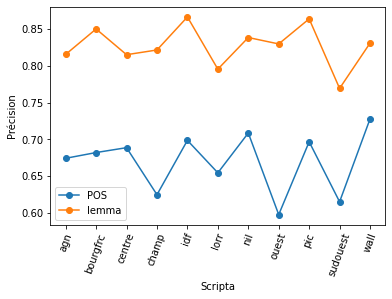

In [54]:
plt.plot(dfPlot,marker="o")
plt.gca().legend(('POS','lemma'))
plt.xticks(rotation=70)
plt.xlabel('Scripta')
plt.ylabel('Précision')
plt.savefig('visualisations/courbes/lieuMSVERNOMADJ.png', dpi=300, transparent=False,bbox_inches='tight')

In [12]:
#pour dates avant plot courbes
dfPlot.index = pd.CategoricalIndex(dfPlot.index, categories= ["nil", "1emxiie", "mxiie", "2emxiie", "1emxiiie", "mxiiie","2emxiiie","1emxive","mxive","2emxive","xve","1emxve","2emxve","mxviiie"])
dfPlot.sort_index(level=0, inplace=True)
dfPlotOrder = dfPlot[::-1] 
dfPlotOrder

label,POS,lemma
typology,,
1emxve,0.6356,0.7966
2emxive,0.7674,0.8198
mxive,0.6852,0.8459
1emxive,0.6970,0.8490
2emxiiie,0.6791,0.8389
mxiiie,0.6735,0.8405
1emxiiie,0.6855,0.8471
2emxiie,0.6618,0.7164
mxiie,0.4286,0.6714


/home/lucence/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:405: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



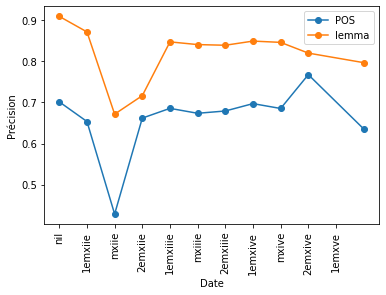

In [13]:
#ploter pour date
plt.plot(dfPlot,marker="o")
plt.gca().legend(('POS','lemma'))
plt.xlabel('Date')
plt.ylabel('Précision')
plt.xticks(rotation=90)
#ax.set_xticklabels(xticklabels, rotation = 45, ha="right")
plt.savefig('visualisations/courbes/dateCompoVERNOMADJ.png', dpi=300) 

In [14]:
#sélectionner les valeurs les plus faibles pour les textes
dfLow = dfPlot.nsmallest(20, 'lemma')
#sélectionner les valeurs les plus hautes
dfHigh = dfPlot.nlargest(20,['lemma'])
dfLow

label,POS,lemma
typology,,
mxiie,0.4286,0.6714
2emxiie,0.6618,0.7164
1emxve,0.6356,0.7966
2emxive,0.7674,0.8198
2emxiiie,0.6791,0.8389
mxiiie,0.6735,0.8405
mxive,0.6852,0.8459
1emxiiie,0.6855,0.8471
1emxive,0.6970,0.8490


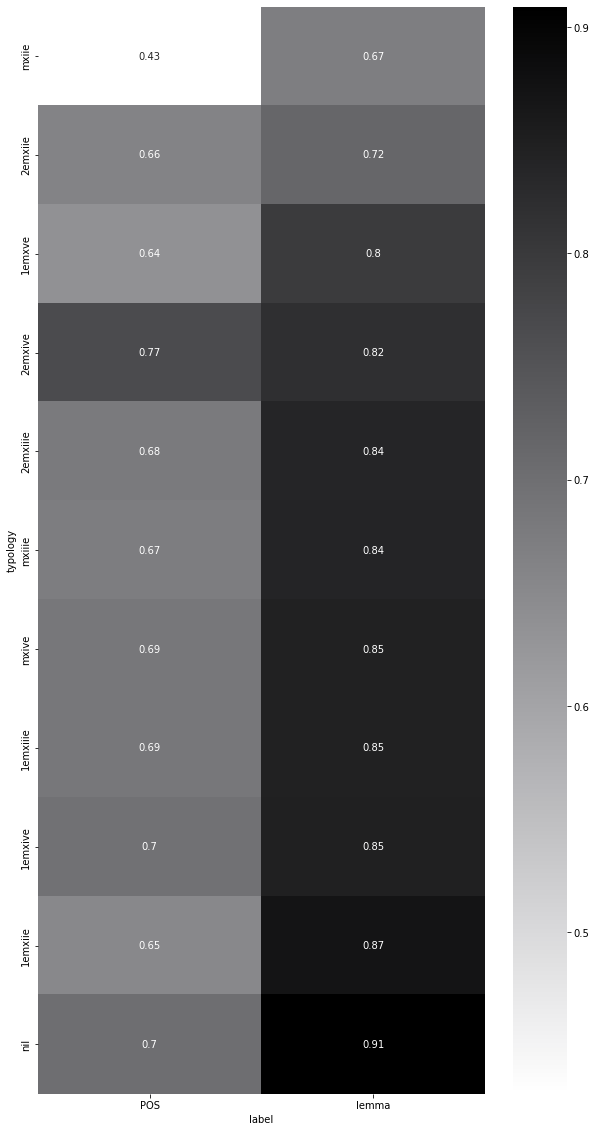

In [15]:
#on plote les valeurs les plus faibles
plt.figure(figsize=(10,20))
cmap = sns.cubehelix_palette(250, hue=0.05, rot=0, light=1, dark=0, as_cmap=True)
ax = sns.heatmap(dfLow, annot=True, cmap=cmap)
plt.savefig('visualisations/heatmaps/lemmaPosTextesLowLemmaVERNOMADJ.png', dpi=300, transparent=False,bbox_inches='tight')